In [2]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rock_vs_paper_vs_sciccors.zip

--2020-07-01 07:03:45--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rock_vs_paper_vs_sciccors.zip’

/tmp/rock_vs_paper_ 100%[===================>] 307.92M  24.9MB/s    in 11s     

2020-07-01 07:03:57 (27.5 MB/s) - ‘/tmp/rock_vs_paper_vs_sciccors.zip’ saved [322873683/322873683]



In [5]:
import zipfile, os
local_zip = '/tmp/rock_vs_paper_vs_sciccors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [7]:
os.listdir(base_dir)

['README_rpc-cv-images.txt', 'scissors', 'rock', 'paper']

In [8]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    rotation_range = 20,
    fill_mode = 'wrap',
    horizontal_flip = True,
    validation_split = 0.2
)

In [9]:
training_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (100, 150),
    shuffle = True,
    subset = 'training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (100, 150),
    subset = 'validation'
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [12]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (100, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dense(3, activation = 'softmax')
])

In [13]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics = ['accuracy']
)

In [14]:
model.fit(
    training_generator,
    steps_per_epoch = 16,
    epochs = 15,
    validation_data = validation_generator,
    validation_steps = 4,
    verbose = 2
)

Epoch 1/15
16/16 - 10s - loss: 1.1130 - accuracy: 0.4160 - val_loss: 0.9817 - val_accuracy: 0.4766
Epoch 2/15
16/16 - 9s - loss: 0.7665 - accuracy: 0.7515 - val_loss: 0.5720 - val_accuracy: 0.7109
Epoch 3/15
16/16 - 9s - loss: 0.4063 - accuracy: 0.8489 - val_loss: 0.6212 - val_accuracy: 0.7969
Epoch 4/15
16/16 - 9s - loss: 0.4341 - accuracy: 0.8449 - val_loss: 0.2863 - val_accuracy: 0.8906
Epoch 5/15
16/16 - 9s - loss: 0.3013 - accuracy: 0.8926 - val_loss: 0.2680 - val_accuracy: 0.9141
Epoch 6/15
16/16 - 9s - loss: 0.1987 - accuracy: 0.9245 - val_loss: 0.2229 - val_accuracy: 0.9062
Epoch 7/15
16/16 - 9s - loss: 0.2046 - accuracy: 0.9316 - val_loss: 0.2316 - val_accuracy: 0.9297
Epoch 8/15
16/16 - 9s - loss: 0.1617 - accuracy: 0.9473 - val_loss: 0.2239 - val_accuracy: 0.9219
Epoch 9/15
16/16 - 9s - loss: 0.2181 - accuracy: 0.9375 - val_loss: 0.1615 - val_accuracy: 0.9609
Epoch 10/15
16/16 - 9s - loss: 0.1751 - accuracy: 0.9512 - val_loss: 0.1902 - val_accuracy: 0.9375
Epoch 11/15
16/16 

In [15]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Saving 0ePX1wuCc3et7leL.png to 0ePX1wuCc3et7leL.png
0ePX1wuCc3et7leL.png
GUNTING


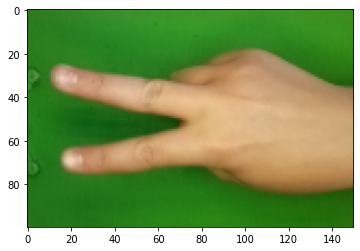

In [19]:
uploaded = files.upload()

for gambar in uploaded.keys():
  path = gambar
  img = image.load_img(path, target_size = (100, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  clasification = model.predict(images, batch_size = 10)

  print(gambar)
  if clasification[0][0] == 1:
    print("KERTAS")
  elif clasification[0][1] == 1:
    print("BATU")
  elif clasification[0][2] == 1:
    print("GUNTING")
  else:
    print("GAMBAR TIDAK DIKETAHUI")